In [ ]:
# pip install datasets

In [1]:
import datasets
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk
from numpy import moveaxis
from numpy import asarray
from PIL import Image
import cv2

In [ ]:
# pip install datasets transformers torch

In [2]:
dataset = load_dataset("imagefolder", data_dir="/home/michaelservilla/CS529/Project_3/train", split='train').train_test_split(test_size=0.2)
print(dataset.shape)
dataset_train = dataset['train']
dataset_test = dataset['test']

Resolving data files:   0%|          | 0/4750 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /home/michaelservilla/.cache/huggingface/datasets/imagefolder/default-c1783a327ea508b0/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.
{'train': (3800, 2), 'test': (950, 2)}


In [3]:
num_classes = len(set(dataset_train['label']))
labels = dataset_train.features['label']
num_classes, labels

(12,
 ClassLabel(names=['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'], id=None))

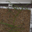

In [4]:
dataset_train[0]['image']

In [5]:
dataset_train[2]['label'], labels.names[dataset_train[2]['label']]

(11, 'Sugar beet')

In [6]:
from transformers import ViTFeatureExtractor
model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [7]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [8]:
example = feature_extractor(dataset_train[0]['image'], return_tensors='pt')
example

{'pixel_values': tensor([[[[ 0.1765,  0.1765,  0.1765,  ..., -0.1765, -0.1765, -0.1765],
          [ 0.1765,  0.1765,  0.1765,  ..., -0.1765, -0.1765, -0.1765],
          [ 0.1765,  0.1765,  0.1765,  ..., -0.1765, -0.1765, -0.1765],
          ...,
          [-0.3804, -0.3804, -0.3804,  ..., -0.3804, -0.3804, -0.3804],
          [-0.3804, -0.3804, -0.3804,  ..., -0.3804, -0.3804, -0.3804],
          [-0.3804, -0.3804, -0.3804,  ..., -0.3804, -0.3804, -0.3804]],

         [[ 0.1608,  0.1608,  0.1608,  ..., -0.2000, -0.2000, -0.2000],
          [ 0.1608,  0.1608,  0.1608,  ..., -0.2000, -0.2000, -0.2000],
          [ 0.1608,  0.1608,  0.1608,  ..., -0.2000, -0.2000, -0.2000],
          ...,
          [-0.4980, -0.4980, -0.4980,  ..., -0.3961, -0.3961, -0.3961],
          [-0.4980, -0.4980, -0.4980,  ..., -0.3961, -0.3961, -0.3961],
          [-0.4980, -0.4980, -0.4980,  ..., -0.3961, -0.3961, -0.3961]],

         [[ 0.1529,  0.1529,  0.1529,  ..., -0.2235, -0.2235, -0.2235],
          [ 0

In [9]:
example['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [10]:
import torch

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [12]:
def preprocess(batch):
  inputs = feature_extractor(batch['image'], return_tensors='pt')
  inputs['label'] = batch['label']
  return inputs

In [13]:
prepared_train = dataset_train.with_transform(preprocess)
prepared_test = dataset_test.with_transform(preprocess)

In [14]:
training_subset = {}
v = 0

for i in range(dataset_train.shape[0]):

    try:
        training_subset[i-v] = prepared_train[i+v]
    except:
        print(i)
        v+=1

print(training_subset.keys())

237
525
860
873
900
1180
1282
1372
1512
1518
1982
2077
2155
2327
2521
2688
2983
3354
3444
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,

In [15]:
testing_subset = {}
u = 0

for i in range(dataset_test.shape[0]):

    try:
        testing_subset[i-u] = prepared_test[i]
    except:
        print(i)
        u += 1

print(testing_subset.keys())


161
504
629
824
832
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

In [16]:
def collate_fn(batch):
  return {'pixel_values':torch.stack([x['pixel_values'] for x in batch]), 'labels':torch.tensor([x['label'] for x in batch])}

In [17]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
  return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)
  

/tmp/ipykernel_9174/3823791970.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [18]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="/content/drive/MyDrive/Colab Notebooks/CS529/cifar", per_device_train_batch_size=16, evaluation_strategy="steps", num_train_epochs=.2, save_steps=100, eval_steps=100, logging_steps=10, learning_rate=2e-4, save_total_limit=2, remove_unused_columns=False, push_to_hub=False, load_best_model_at_end=True)


In [19]:
from transformers import ViTForImageClassification

labels = dataset_train.features['label'].names

model = ViTForImageClassification.from_pretrained(model_name_or_path, num_labels=len(labels))


Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

In [34]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args, data_collator=collate_fn, compute_metrics=compute_metrics, train_dataset=prepared_train, eval_dataset=prepared_test, tokenizer=feature_extractor)

PermissionError: [Errno 13] Permission denied: '/content'

In [35]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

NameError: name 'trainer' is not defined